Predicting the cost of health insurance for a person
The important insurance company 4Geeks Insurance S.L. wants to calculate, based on the physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors, and based on data from other companies and a particular study, it has managed to gather a set of data to train a predictive model.


#Her müşterinin ödemesi gereken sigorta ücretini (premium) tahmin etmek

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)


In [3]:
main_df=pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=416&path=medical_insurance_cost.csv")

In [4]:
main_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
main_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
main_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_df,test_df =train_test_split(main_df)

In [10]:
train_df

,age,sex,bmi,children,smoker,region,charges
487,19,male,28.700,0,no,southwest,1253.93600
389,24,female,30.210,3,no,northwest,4618.07990
1312,34,male,42.900,1,no,southwest,4536.25900
594,41,male,40.260,0,no,southeast,5709.16440
214,45,female,30.900,2,no,southwest,8520.02600
...,...,...,...,...,...,...,...
1083,32,male,31.500,1,no,southwest,4076.49700
913,44,female,27.500,1,no,southwest,7626.99300
62,64,male,24.700,1,no,northwest,30166.61817
1277,32,female,29.735,0,no,northwest,4357.04365


In [11]:
train_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
train_dummies= pd.get_dummies(train_df,drop_first=True)

In [13]:
train_dummies

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
487,19,28.700,0,1253.93600,True,False,False,False,True
389,24,30.210,3,4618.07990,False,False,True,False,False
1312,34,42.900,1,4536.25900,True,False,False,False,True
594,41,40.260,0,5709.16440,True,False,False,True,False
214,45,30.900,2,8520.02600,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
1083,32,31.500,1,4076.49700,True,False,False,False,True
913,44,27.500,1,7626.99300,False,False,False,False,True
62,64,24.700,1,30166.61817,True,False,True,False,False
1277,32,29.735,0,4357.04365,False,False,True,False,False


In [14]:
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 487 to 30
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1003 non-null   int64  
 1   bmi               1003 non-null   float64
 2   children          1003 non-null   int64  
 3   charges           1003 non-null   float64
 4   sex_male          1003 non-null   bool   
 5   smoker_yes        1003 non-null   bool   
 6   region_northwest  1003 non-null   bool   
 7   region_southeast  1003 non-null   bool   
 8   region_southwest  1003 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 44.1 KB


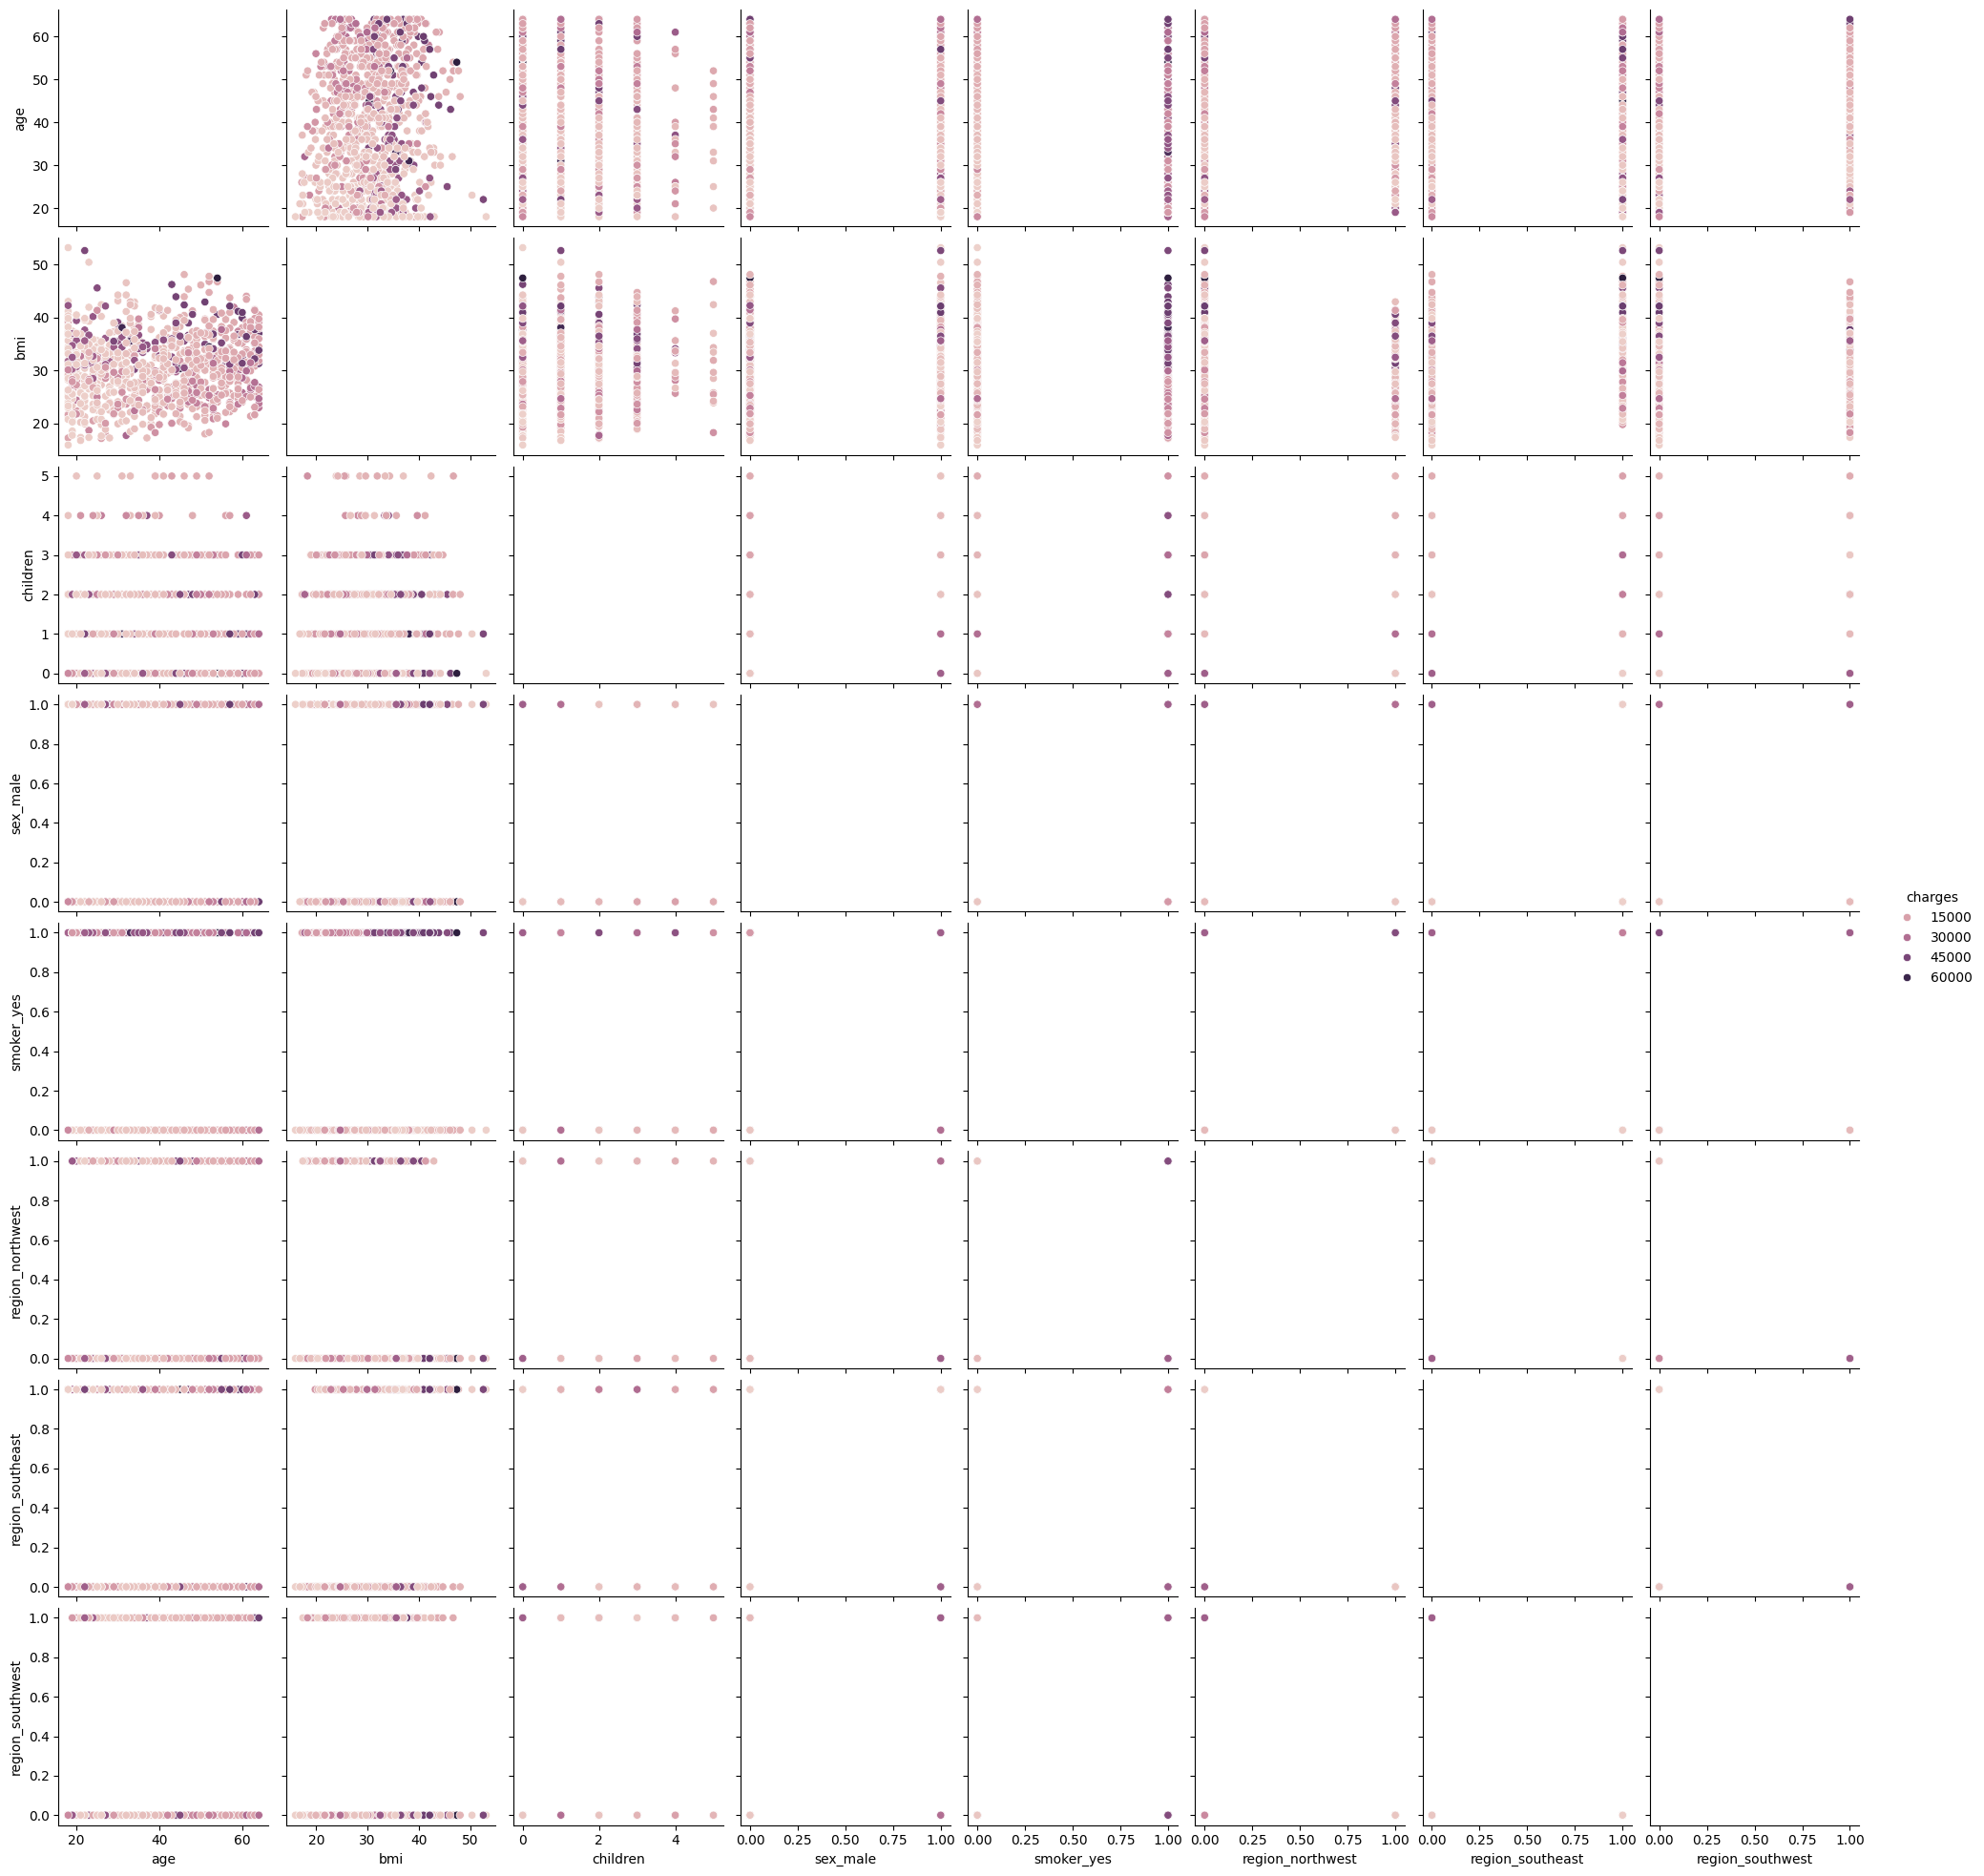

In [15]:
sns.pairplot(data=train_dummies,hue='charges')

In [16]:
train_dummies.corr()['charges']

age                 0.316342
bmi                 0.204986
children            0.093396
charges             1.000000
sex_male            0.062649
smoker_yes          0.784385
region_northwest   -0.048814
region_southeast    0.105223
region_southwest   -0.070779
Name: charges, dtype: float64

In [17]:
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 487 to 30
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1003 non-null   int64  
 1   bmi               1003 non-null   float64
 2   children          1003 non-null   int64  
 3   charges           1003 non-null   float64
 4   sex_male          1003 non-null   bool   
 5   smoker_yes        1003 non-null   bool   
 6   region_northwest  1003 non-null   bool   
 7   region_southeast  1003 non-null   bool   
 8   region_southwest  1003 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 44.1 KB


In [18]:
temp_df= pd.get_dummies(data=train_df,dtype=int,drop_first=True)

<Axes: >

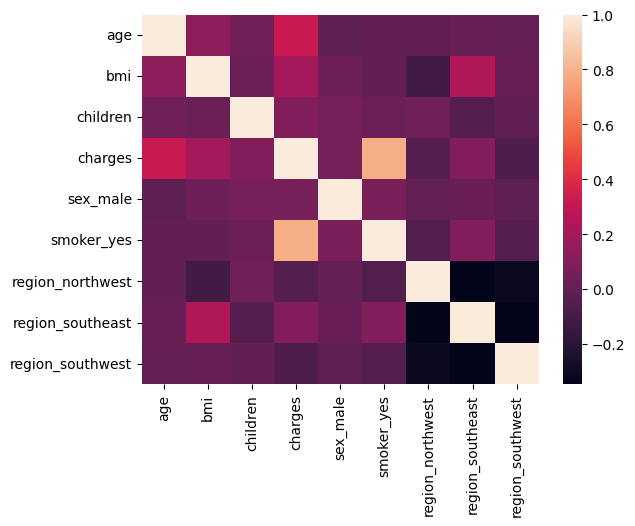

In [19]:
sns.heatmap(temp_df.corr())

In [20]:
x_train = train_dummies.drop(columns='charges')
y_train = train_dummies['charges']

In [21]:
from sklearn.linear_model import LinearRegression


In [22]:
linreg_model=LinearRegression()
linreg_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
train_preds=linreg_model.predict(x_train)

Text(0.5, 1.0, 'actual vs predict')

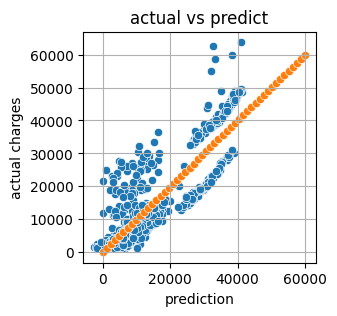

In [24]:
plt.figure(figsize=(3,3))
sns.scatterplot(x=train_preds,y=y_train)
sns.scatterplot(x=np.linspace(0,60000),y=np.linspace(0,60000))
plt.grid()
plt.xlabel("prediction")
plt.ylabel("actual charges")
plt.title("actual vs predict")

Text(0, 0.5, 'frequency')

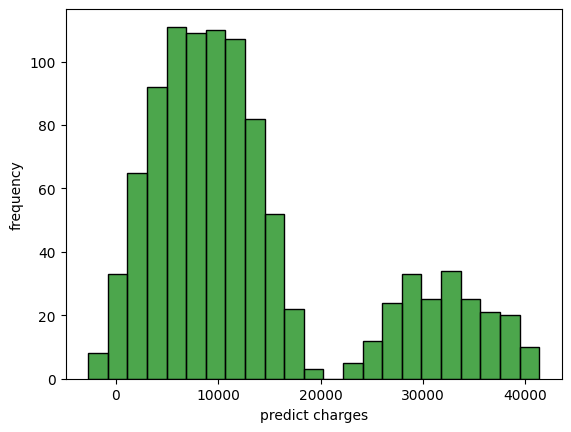

In [25]:
sns.histplot(data=train_preds,alpha=0.7,color="green")
plt.xlabel("predict charges")
plt.ylabel("frequency")

In [26]:
train_residuals= train_preds - y_train

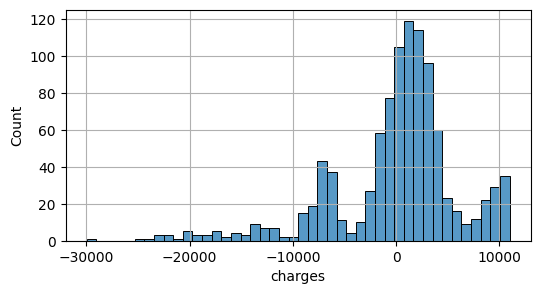

In [27]:
plt.figure(figsize=(6,3))
sns.histplot(x=train_residuals)
plt.grid()

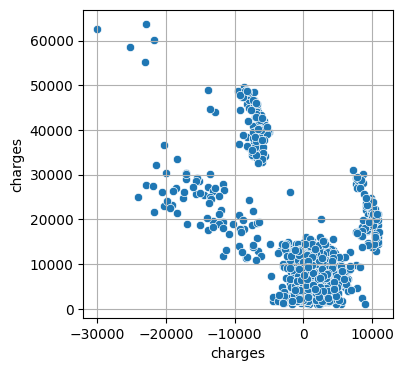

In [28]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=train_residuals,y=y_train)
plt.grid()

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

Metrik/	                                            Mantığı/	                              Ne Zaman Kullanılır?	                           

/Örnek

MAE (Mean Absolute Error):	Tahminler ile gerçek değer arasındaki ortalama mutlak fark/	Genel hatayı görmek istediğinde/	Model ortalama olarak 10.000$ sapıyor mu?

Metrik	/                             Mantığı   /                                             Ne Zaman Kullanılır?
                                                                  
MSE (Mean Squared Error):    Farkları kareye alır → büyük hataları daha çok cezalandırır/   Büyük hataların ciddi problem olduğu durumlarda

Örnek

Çok pahalı evler varsa ve büyük hataları vurgulamak istiyorsan                     
	                                                    

Metrik	/                             Mantığı   /                                             Ne Zaman Kullanılır?

RMSE (Root MSE):MSE’nin karekökü → hata birimi orijinal birimle olur/Hata birimini anlamak istediğinde/Ev fiyatı tahmininde $ olarak hata ölçmek istiyorsan

metrik	/                             Mantığı   /                                             Ne Zaman Kullanılır?

R² (Coefficient of Determination):Modelin verideki değişimi ne kadar açıkladığını gösterir/Modelin başarısını genel olarak görmek istediğinde
R² = 0.9 → model hedefi %90 oranında açıklıyor

In [30]:
print ("on the test data")
print(f"mean_absolute_error (MAE) : {mean_absolute_error(y_true=y_train,y_pred=train_preds)}")
#tahmin ile gerçek arasındaki ort fark
print(f"mean_squared_error : {mean_squared_error(y_true=y_train,y_pred=train_preds)}")
#farkları kareye alır 
print(f"root_mean_squared_error : {root_mean_squared_error(y_true=y_train,y_pred=train_preds)}")
# hat birimi orjinal birimde
print(f"r^2 error :{r2_score(y_true=y_train,y_pred=train_preds)}")

on the test data
mean_absolute_error (MAE) : 4299.16695476989
mean_squared_error : 37472504.00660707
root_mean_squared_error : 6121.478906817132
r^2 error :0.7510451047501654


In [62]:
pd.DataFrame(linreg_model.coef_,linreg_model.feature_names_in_).reset_index()

,index,0
0,age,254.103296
1,bmi,356.165060
2,children,574.867336
3,sex_male,55.895616
4,smoker_yes,23720.564840
5,region_northwest,-309.743784
6,region_southeast,-1054.792560
7,region_southwest,-1533.595633


In [63]:
x_train.mean() * linreg_model.coef_

age                  9900.148140
bmi                 10899.868841
children              613.841393
sex_male               27.919944
smoker_yes           4942.769742
region_northwest      -75.351429
region_southeast     -287.097078
region_southwest     -359.317023
dtype: float64

In [33]:
# test_df

In [61]:
test_dummies= pd.get_dummies(test_df,drop_first=True).reset_index()

In [ ]:
x_test = test_df.drop(columns=['charges'])
y_test = test_df['charges']


In [36]:
x_test_dummies = pd.get_dummies(x_test)

In [37]:
x_test

,age,sex,bmi,children,smoker,region
1226,38,male,16.815,2,no,northeast
1291,19,male,34.900,0,yes,southwest
763,27,male,26.030,0,no,northeast
322,34,male,30.800,0,yes,southwest
197,45,female,28.600,2,no,southeast
...,...,...,...,...,...,...
767,42,female,29.000,1,no,southwest
582,39,male,45.430,2,no,southeast
1209,59,male,37.100,1,no,southwest
578,52,male,30.200,1,no,southwest


In [38]:
x_test_dummies  = x_test_dummies[x_train.columns]

In [39]:
x_test_dummies

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1226,38,16.815,2,True,False,False,False,False
1291,19,34.900,0,True,True,False,False,True
763,27,26.030,0,True,False,False,False,False
322,34,30.800,0,True,True,False,False,True
197,45,28.600,2,False,False,False,True,False
...,...,...,...,...,...,...,...,...
767,42,29.000,1,False,False,False,False,True
582,39,45.430,2,True,False,False,True,False
1209,59,37.100,1,True,False,False,False,True
578,52,30.200,1,True,False,False,False,True


<Axes: >

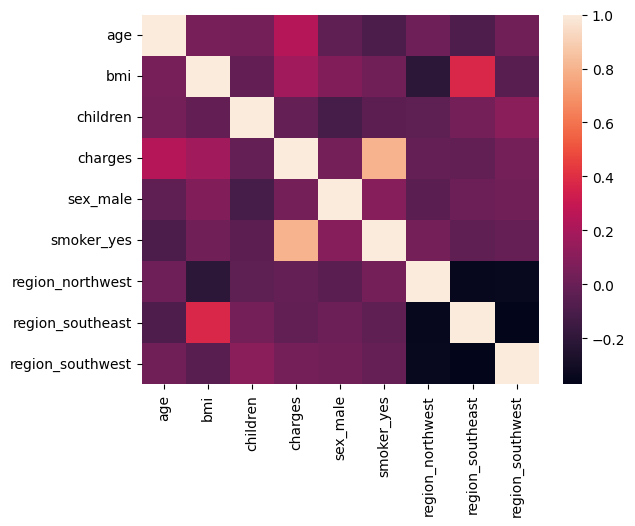

In [40]:
sns.heatmap(test_dummies.corr())

In [41]:
x_test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 1226 to 886
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               335 non-null    int64  
 1   bmi               335 non-null    float64
 2   children          335 non-null    int64  
 3   sex_male          335 non-null    bool   
 4   smoker_yes        335 non-null    bool   
 5   region_northwest  335 non-null    bool   
 6   region_southeast  335 non-null    bool   
 7   region_southwest  335 non-null    bool   
dtypes: bool(5), float64(1), int64(2)
memory usage: 12.1 KB


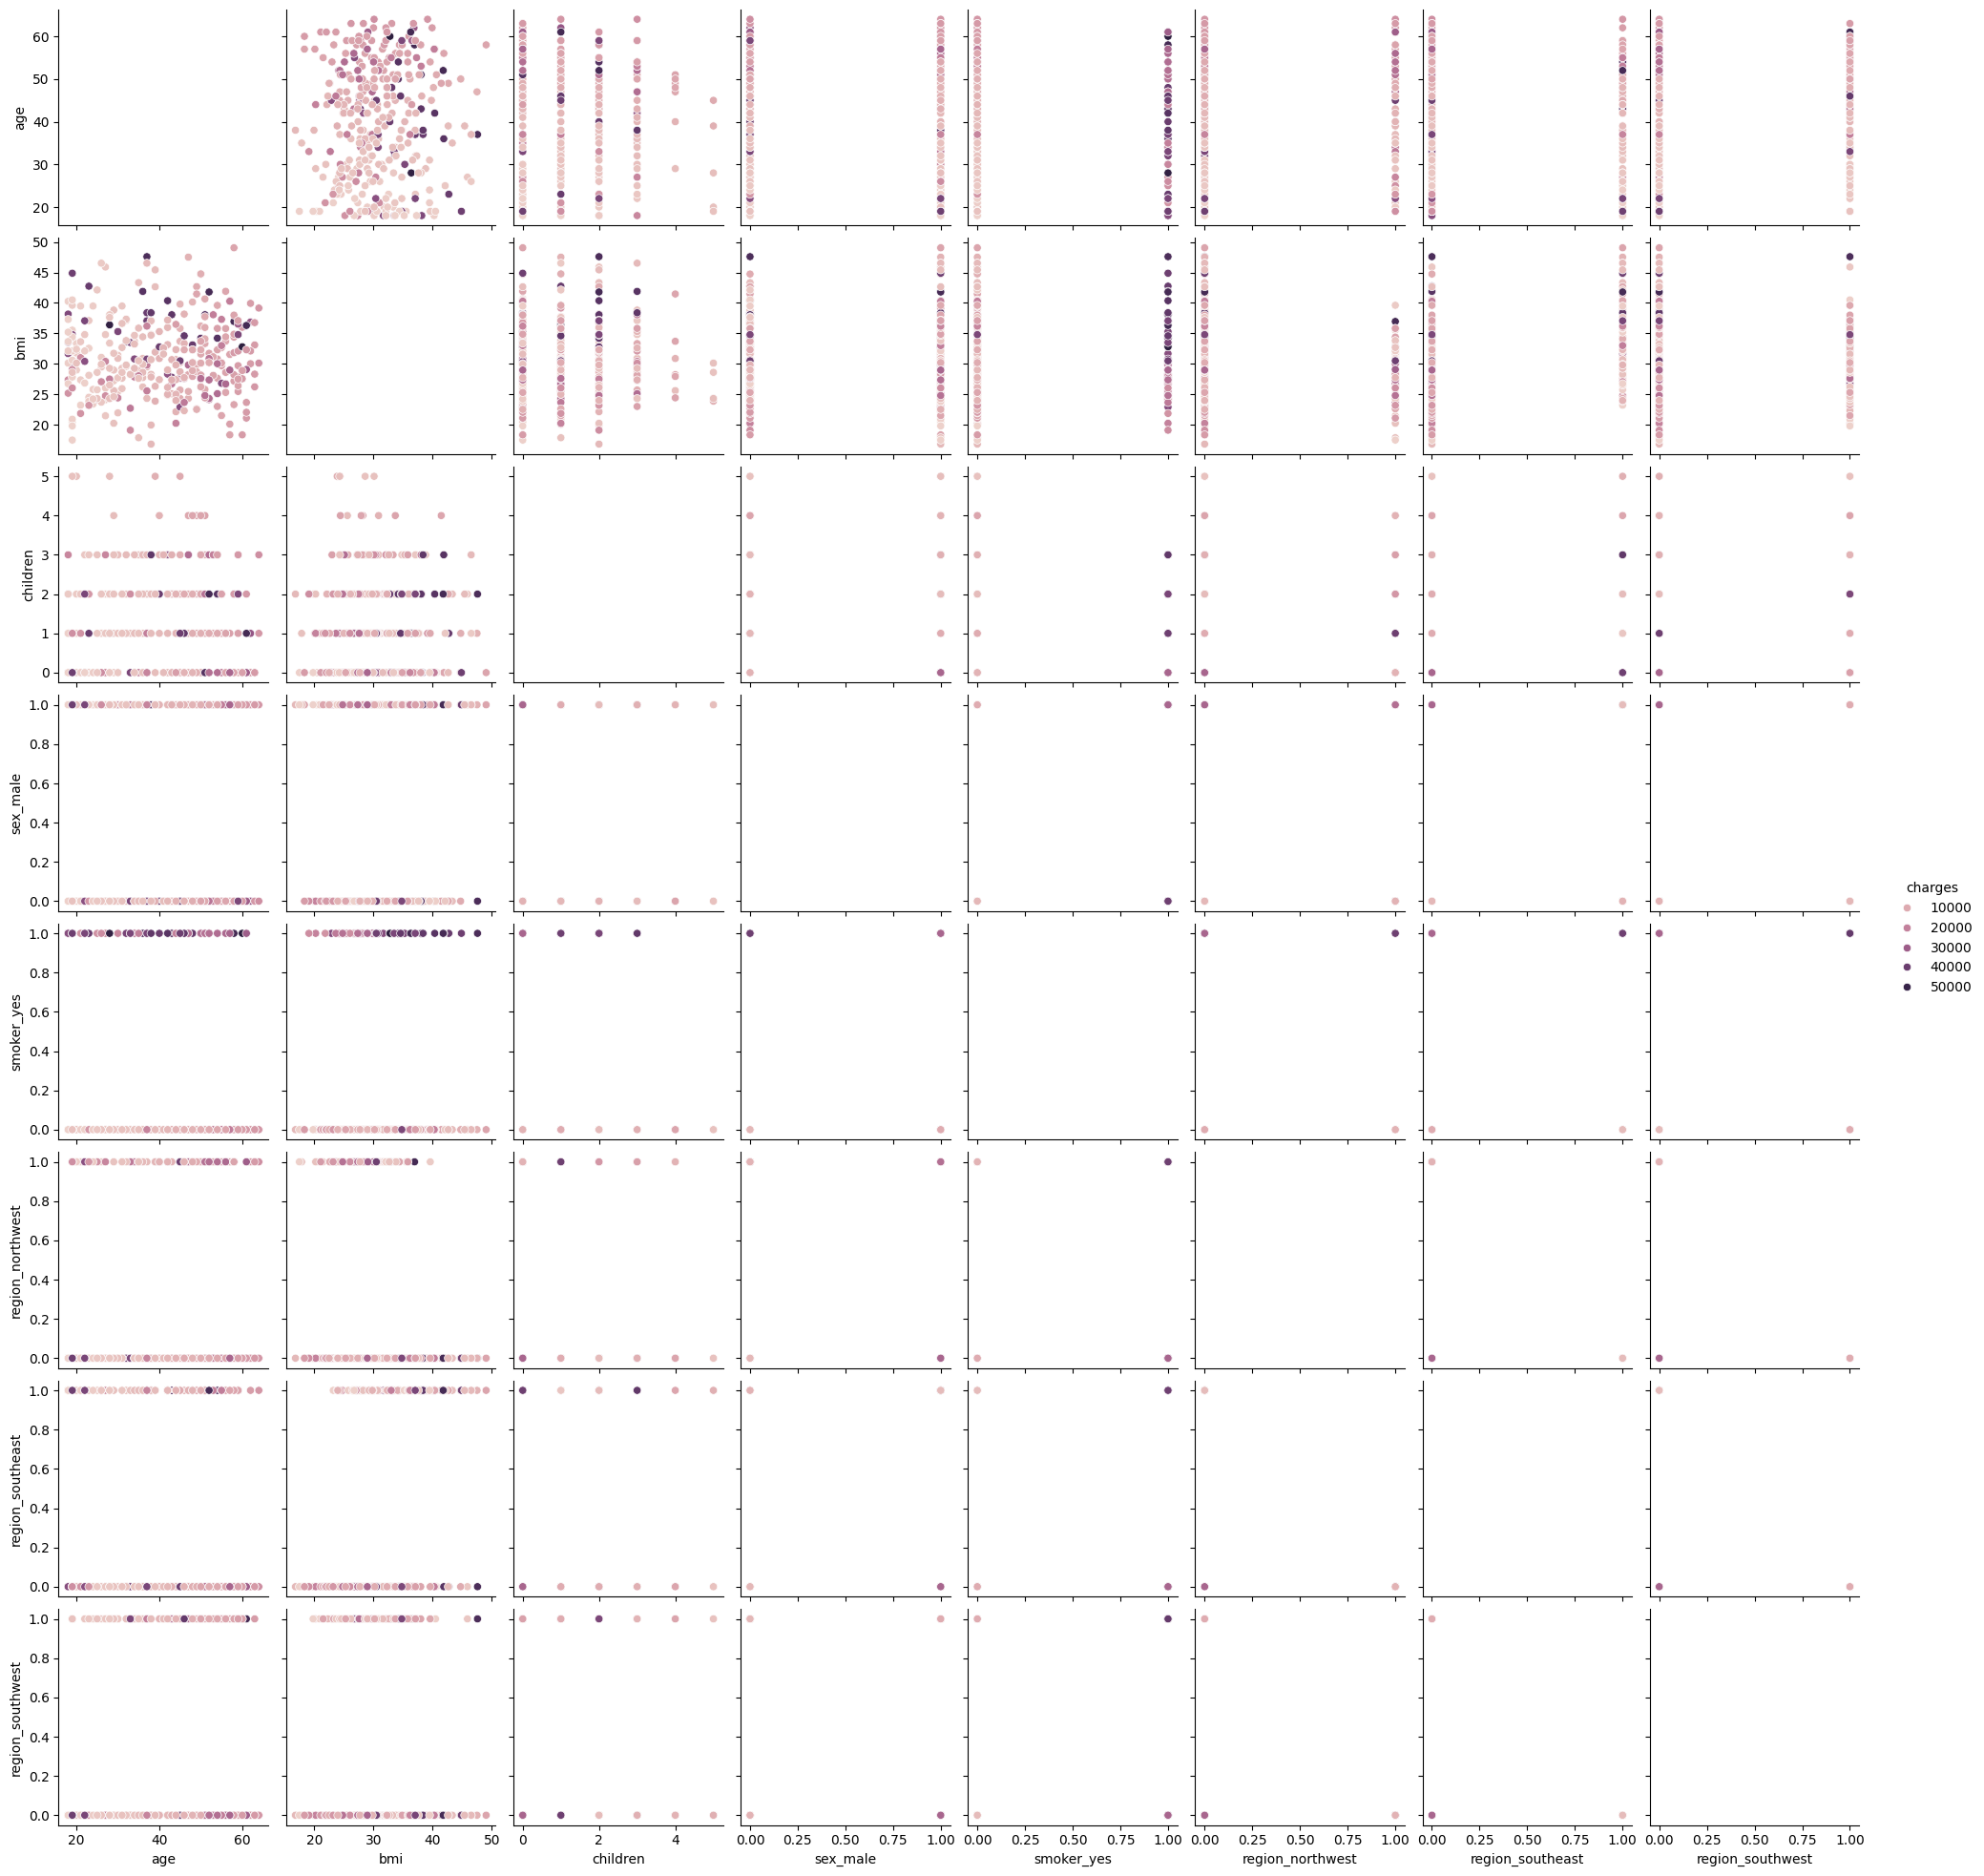

In [42]:

sns.pairplot(data=test_dummies,hue='charges')

In [43]:
test_dummies.corr()['charges']

age                 0.243048
bmi                 0.177910
children           -0.012392
charges             1.000000
sex_male            0.041054
smoker_yes          0.796831
region_northwest   -0.011734
region_southeast   -0.024916
region_southwest    0.040966
Name: charges, dtype: float64

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
test_preds = linreg_model.predict(x_test_dummies)

In [46]:
test_preds

array([ 4510.45841764, 27160.97545421,  3847.648526  , 29512.24814014,
        9375.89854803, 33561.38336504, 13123.47309237,  4888.64645147,
        7929.87631258,  3282.19646556,  5563.8364904 ,  6624.31358833,
        5478.65401375,  4159.48270132, 11641.26855717, 12542.45560399,
       13014.4670319 , 13094.39708804, 13327.6815538 , 27125.35894816,
        9101.6514515 , 33025.85171365,   263.85072248, 40176.50970199,
        5850.29177927, 11492.87201517, 13381.02186876, 30098.57772975,
        6187.69227935, 33453.31007634,  4406.94432829,  9326.59578038,
       17117.50319559,  1857.89645035, 12084.73858293, 30730.68261907,
        -491.22678628, 15729.90814172, 37351.970098  , 14148.96940679,
        6589.00295301,  7343.53369555,  1570.75871035,  3614.13783842,
       27940.98057925, 12546.58452314, 16103.77636256, 15179.30462867,
         615.02889746, 11366.21559441, 13215.94200952, 31025.49522172,
        8439.0841356 ,  7519.04883171,  5077.09252572,  8264.7765681 ,
      

<Axes: ylabel='Count'>

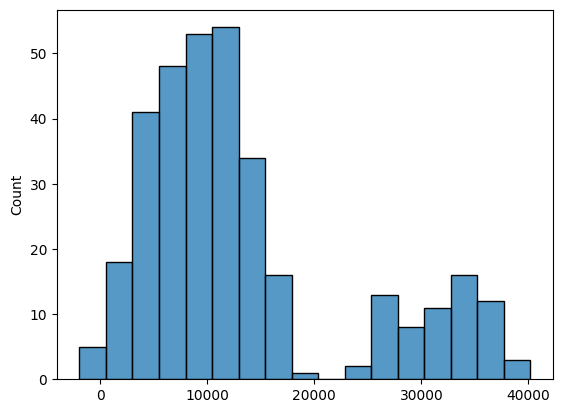

In [47]:
plt.Figure(figsize=(4,4))
sns.histplot(data=test_preds)

Text(0, 0.5, 'actual charges')

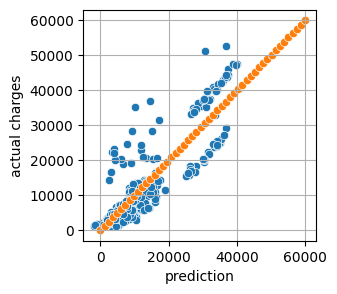

In [48]:
plt.figure(figsize=(3,3))
sns.scatterplot(x=test_preds,y=y_test)
sns.scatterplot(x=np.linspace(0,60000),y=np.linspace(0,60000))
plt.grid()
plt.xlabel("prediction")
plt.ylabel("actual charges")

Text(0, 0.5, 'frequent')

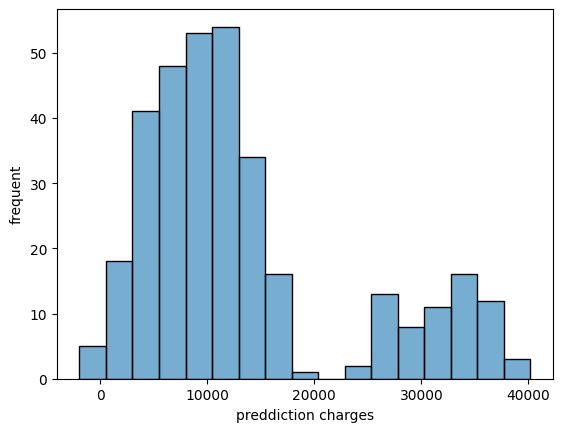

In [49]:
sns.histplot(data=test_preds,alpha=0.6)
plt.xlabel("preddiction charges")
plt.ylabel("frequent")

In [50]:
test_residuals = test_preds - y_test

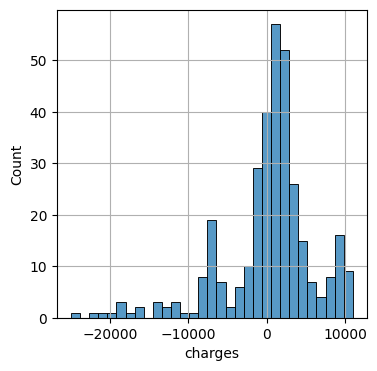

In [51]:
plt.figure(figsize=(4,4))
sns.histplot(data=test_residuals)
plt.grid()

Text(0, 0.5, 'actual price')

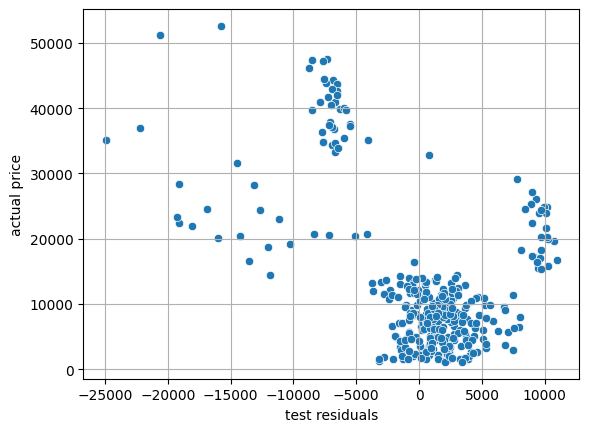

In [54]:
sns.scatterplot(x=test_residuals,y=y_test)
plt.grid()
plt.xlabel("test residuals")
plt.ylabel("actual price")

In [65]:
round(pd.DataFrame(linreg_model.coef_, linreg_model.feature_names_in_).reset_index())

,index,0
0,age,254.0
1,bmi,356.0
2,children,575.0
3,sex_male,56.0
4,smoker_yes,23721.0
5,region_northwest,-310.0
6,region_southeast,-1055.0
7,region_southwest,-1534.0


In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score


In [60]:
print ("on the test data")
print(f"mean absolute error : {mean_absolute_error(y_true=y_test,y_pred=test_preds)}")
print(f"mean squarred error : {mean_squared_error(y_true=y_test,y_pred=test_preds)}")
print(f"root mean squared error :{root_mean_squared_error(y_true=y_test,y_pred=test_preds)}")
print(f"r2 score : {r2_score(y_true=y_test,y_pred=test_preds)}")

on the test data
mean absolute error : 4047.890143443445
mean squarred error : 33997323.98427613
root mean squared error :5830.722423874775
r2 score : 0.7474276314373378


In [ ]:
#lasso (L2)



In [66]:
from sklearn.linear_model import Lasso

In [67]:
lasso_model= Lasso(alpha=10,max_iter=5000)
lasso_model.fit(x_train,y_train)

,alpha,10
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,5000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [68]:
lasso_train_preds=lasso_model.predict(x_train)

In [70]:
lasso_train_preds

array([ 1275.25231793,  5991.96787318, 10687.4162758 , ...,
       13082.88770589,  6145.86645704, 28145.25857719], shape=(1003,))

Text(0, 0.5, 'actual price')

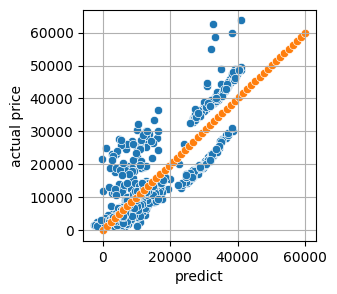

In [76]:
plt.figure(figsize=(3,3))
sns.scatterplot(x=lasso_train_preds,y=y_train)
sns.scatterplot(x=np.linspace(0,60000),y=np.linspace(0,60000))
plt.grid()
plt.xlabel("predict")
plt.ylabel("actual price")


In [79]:
temp_df=pd.DataFrame(lasso_model.coef_,lasso_model.feature_names_in_)
temp_df[temp_df[0]>0]

,0
age,254.089435
bmi,354.270632
children,570.179450
sex_male,19.732497
smoker_yes,23663.270591


In [80]:
def evaluation_maker(y_actual, y_predicted):
  print(f"Mean Absolute error (MAE): {round(mean_absolute_error(y_true = y_actual, y_pred = y_predicted))}")
  print(f"Root Mean Squared error (RMSE): {round(root_mean_squared_error(y_true = y_actual, y_pred = y_predicted))}")
  print(f"R^2 score: {round(r2_score(y_true = y_actual, y_pred = y_predicted), 4)}")
  

In [84]:
alpha_list=[0.5,1,2,5,10,50,100,500]
for i in alpha_list:
    model=Lasso(alpha=i,max_iter=5000)
    model.fit(x_train,y_train)
    training_preds=model.predict(x_train)
    testing_preds=model.predict(x_test_dummies)
    print(f"\n\n\nFor alpha = {i}, the TRAINING set:")
    evaluation_maker(y_train, training_preds)
    print(f"\n******** the TESTING set: ********")
    evaluation_maker(y_test,test_preds)




For alpha = 0.5, the TRAINING set:
Mean Absolute error (MAE): 4299
Root Mean Squared error (RMSE): 6121
R^2 score: 0.751

******** the TESTING set: ********
Mean Absolute error (MAE): 4048
Root Mean Squared error (RMSE): 5831
R^2 score: 0.7474



For alpha = 1, the TRAINING set:
Mean Absolute error (MAE): 4299
Root Mean Squared error (RMSE): 6121
R^2 score: 0.751

******** the TESTING set: ********
Mean Absolute error (MAE): 4048
Root Mean Squared error (RMSE): 5831
R^2 score: 0.7474



For alpha = 2, the TRAINING set:
Mean Absolute error (MAE): 4300
Root Mean Squared error (RMSE): 6121
R^2 score: 0.751

******** the TESTING set: ********
Mean Absolute error (MAE): 4048
Root Mean Squared error (RMSE): 5831
R^2 score: 0.7474



For alpha = 5, the TRAINING set:
Mean Absolute error (MAE): 4301
Root Mean Squared error (RMSE): 6122
R^2 score: 0.751

******** the TESTING set: ********
Mean Absolute error (MAE): 4048
Root Mean Squared error (RMSE): 5831
R^2 score: 0.7474



For alpha = 10,